In [1]:
import numpy as np
import pandas as pd

import sys
import string
from io import StringIO
import re

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import pysam

In [559]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/Fig. 4/'

In [570]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 4/'

In [560]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig 4C

# Load the Amplicon sequencing data

In [563]:
reads_df = pd.read_csv(data_path + 'Fully mapped barcode array_Wnt_BC1_3 x Replicates_Amplicon_seq.csv')
reads_df

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,BC11,BC12,Replicate
0,T,C,C,C,C,C,C,T,C,T,C,T,Rep1
1,T,C,C,T,T,G,G,C,T,T,T,T,Rep1
2,T,T,T,T,T,T,T,T,T,T,T,G,Rep1
3,C,C,C,T,C,T,T,T,T,T,T,T,Rep1
4,C,C,C,C,C,C,T,T,T,T,T,T,Rep1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,T,T,T,T,T,T,T,T,T,T,T,T,Control
3925,T,T,T,T,T,T,T,T,T,T,T,T,Control
3926,T,T,T,T,T,T,T,T,T,T,T,T,Control
3927,T,T,T,T,T,T,T,T,T,T,T,T,Control


In [564]:
Fully_mapped_reads_number = reads_df.groupby('Replicate', as_index=False).size()
Fully_mapped_reads_number

,Replicate,size
0,Control,1178
1,Rep1,829
2,Rep2,985
3,Rep3,937


In [566]:
edited_df = pd.read_csv(data_path + 'Edited barcode array_Wnt_BC1_3 x Replicates_Amplicon_Seq.csv')
edited_df

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,BC11,BC12,Replicate
0,T,C,C,C,C,C,C,T,C,T,C,T,Rep1
1,C,C,C,T,C,T,T,T,T,T,T,T,Rep1
2,C,C,C,C,C,C,T,T,T,T,T,T,Rep1
3,T,C,T,T,C,T,T,C,T,T,C,T,Rep1
4,T,T,T,T,T,T,T,C,T,C,T,T,Rep1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,T,T,T,T,T,T,T,C,T,T,T,T,Control
1490,T,T,T,C,T,T,T,T,C,T,T,T,Control
1491,T,T,T,T,T,C,T,T,T,T,T,T,Control
1492,T,T,T,T,T,T,C,T,T,T,T,T,Control


In [567]:
edited_reads_number = reads_df.groupby('Replicate', as_index=False).size()
edited_reads_number

,Replicate,size
0,Control,1178
1,Rep1,829
2,Rep2,985
3,Rep3,937


In [568]:
# Define Multi-Index for Rows
index = pd.MultiIndex.from_tuples([
    ("Amplicon sequencing", "Fully mapped reads number"),
    ("Amplicon sequencing", "Edited reads number"),
    ("Amplicon sequencing", "Proportion of edited reads")
])

# Define Column Names
columns = ["WntR_Rep1", "WntR_Rep2", "WntR_Rep3", "WntR_Control"]

# Define Data
data = [
    [829, 985, 937, 1178],
    [472, 533, 431, 58],
    [472/829, 533/985, 431/937, 58/1178]
]

# Create DataFrame
Amp_df = pd.DataFrame(data, index=index, columns=columns)
Amp_df.loc[("Amplicon sequencing", "Proportion of edited reads")] *= 100
# Display DataFrame
Amp_df

WntR_Rep1   WntR_Rep2  \
Amplicon sequencing Fully mapped reads number   829.000000  985.000000   
                    Edited reads number         472.000000  533.000000   
                    Proportion of edited reads   56.936068   54.111675   

                                                 WntR_Rep3  WntR_Control  
Amplicon sequencing Fully mapped reads number   937.000000   1178.000000  
                    Edited reads number         431.000000     58.000000  
                    Proportion of edited reads   45.997866      4.923599

# Load the ratiometric readout data from the same cell population

In [571]:
recording_conditions = pd.read_csv(file_path + 'WNT-BC1_recording_conditions_Amplicon_Seq&Ratiometric_readout.csv')
recording_conditions

,cell_line,TMP (uM),Dox (ng/ml ),CHIR (uM),stimulation time (Days),chasing time (Day)
0,1,10,500,3,3,1
1,2,10,500,3,3,1
2,3,10,500,3,3,1
3,4,10,500,0,3,1
4,5,0,0,0,3,1


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement
    path_647mask = data_dir + 'ch2_mask/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'
    path_546mask = data_dir + 'ch3_mask/' + re.split('/', f)[-1][0:-4] + '_ch3_Probabilities.tif'
    path_DAPImask = data_dir + 'ch4_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch4_cp_masks.png'
    
    path_CFPmax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch1.tif'
    path_647max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch2.tif'
    path_546max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch3.tif'
    path_DAPImax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch4.tif'

In [572]:
bc_df = pd.read_csv(data_path + 'Single barcode array_Wnt_BC1_3 x Replicates_Ratiometric_readout.csv')

In [573]:
# Assuming filter_df is your DataFrame with relevant data
temp_df = bc_df.copy()

# Group by 'cell_line' and aggregate the 'mout avg mean' column
stats_df = temp_df.groupby('cell_line')['mout avg'].agg(
    mean='mean',
    min='min',
    max='max',
    median='median',
    percentile_15=lambda x: x.quantile(0.15),
    percentile_75=lambda x: x.quantile(0.75),
    percentile_5=lambda x: x.quantile(0.05),
    percentile_95=lambda x: x.quantile(0.95)
).reset_index()

stats_df

,cell_line,mean,min,max,median,percentile_15,percentile_75,percentile_5,percentile_95
0,1,3.068061,0.050085,11.992074,0.931818,0.463536,5.028713,0.311129,11.684595
1,2,2.320421,0.044136,11.992448,0.768190,0.487483,2.656637,0.357597,9.734570
2,3,2.495162,0.053117,11.992443,0.811988,0.470417,2.930174,0.331368,10.153185
3,4,0.602580,0.045038,11.952096,0.536248,0.353522,0.662836,0.243499,0.911761
4,5,0.510052,0.037551,8.603310,0.503201,0.313164,0.615314,0.186598,0.828656


In [574]:
total_barcode_counts = bc_df.groupby('cell_line', as_index=False)['barcode_number'].sum()
total_barcode_counts

,cell_line,barcode_number
0,1,2546
1,2,2620
2,3,2963
3,4,3096
4,5,2991


In [575]:
temp_df = bc_df.loc[bc_df['mout avg'] > 0.828656].copy()
edited_barcode_counts = temp_df.groupby('cell_line', as_index=False)['barcode_number'].sum()
edited_barcode_counts

,cell_line,barcode_number
0,1,1378
1,2,1202
2,3,1442
3,4,284
4,5,150


In [576]:
# Define Multi-Index for Rows
index = pd.MultiIndex.from_tuples([
    ("Ratiometric readout", "Quantified barcode array number"),
    ("Ratiometric readout", "Edited barcode array number"),
    ("Ratiometric readout", "Proportion of edited barcode array ")
])

# Define Column Names
columns = ["WntR_Rep1", "WntR_Rep2", "WntR_Rep3", "WntR_Control"]

# Define Data

data = [
    [2546, 2620, 2963, 2991],
    [1378, 1202, 1442, 150],
    [1378/2546, 1202/2620, 1442/2963, 150/2991]
]

# Create DataFrame
Ratiometric_df = pd.DataFrame(data, index=index, columns=columns)
Ratiometric_df.loc[("Ratiometric readout", "Proportion of edited barcode array ")] *= 100
# Display DataFrame
Ratiometric_df

WntR_Rep1  \
Ratiometric readout Quantified barcode array number      2546.000000   
                    Edited barcode array number          1378.000000   
                    Proportion of edited barcode array     54.124116   

                                                           WntR_Rep2  \
Ratiometric readout Quantified barcode array number      2620.000000   
                    Edited barcode array number          1202.000000   
                    Proportion of edited barcode array     45.877863   

                                                           WntR_Rep3  \
Ratiometric readout Quantified barcode array number      2963.000000   
                    Edited barcode array number          1442.000000   
                    Proportion of edited barcode array     48.666892   

                                                         WntR_Control  
Ratiometric readout Quantified barcode array number       2991.000000  
                    Edited barcode array number            150.000000  
                    Proportion of edited barcode array       5.015045

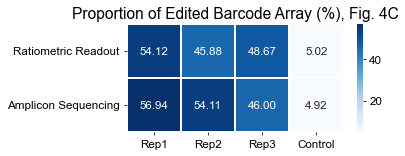

In [577]:
# Extract only the "Proportion of edits (%)" rows
Amp_proportion = Amp_df.loc[("Amplicon sequencing", "Proportion of edited reads")]
Ratiometric_proportion = Ratiometric_df.loc[("Ratiometric readout", "Proportion of edited barcode array ")]

# Combine into a single DataFrame
combined_df = pd.DataFrame({
    "Rep1": [Ratiometric_proportion["WntR_Rep1"], Amp_proportion["WntR_Rep1"]],
    "Rep2": [Ratiometric_proportion["WntR_Rep2"], Amp_proportion["WntR_Rep2"]],
    "Rep3": [Ratiometric_proportion["WntR_Rep3"], Amp_proportion["WntR_Rep3"]],
    "Control": [Ratiometric_proportion["WntR_Control"], Amp_proportion["WntR_Control"]]
}, index=["Ratiometric Readout", "Amplicon Sequencing"])

# Plot heatmap
plt.figure(figsize=(5, 2), dpi=70)
sns.heatmap(combined_df, cmap='Blues', annot=True, fmt='.2f', linewidth=0.25)

# Customize labels
plt.ylabel("")  # Omit ylabel
plt.title("Proportion of Edited Barcode Array (%), Fig. 4C")
#save_path = os.path.join(dirPath, f'240520_dWntRsg21_3_replicas_Proportion of edited barode array_Imag&Seq.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig 4D

In [519]:
#display_df.to_csv(data_path + 'Edit status of Single barcode array_Wnt_BC1_3 x Replicates.csv', index=False)

In [578]:
display_df = pd.read_csv(data_path + 'Edit status of Single barcode array_Wnt_BC1_3 x Replicates.csv')
display_df

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,BC11,BC12,edits,Replicate
0,0,1,0,0,0,0,0,0,0,0,0,0,1,Rep1
1,0,0,0,0,1,0,0,0,0,0,0,0,1,Rep3
2,0,1,0,0,0,0,0,0,0,0,0,0,1,Rep3
3,0,0,1,0,0,0,0,0,0,0,0,0,1,Rep1
4,0,0,1,0,0,0,0,0,0,0,0,0,1,Rep1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1,1,1,1,1,1,1,1,1,1,1,1,12,Rep2
1432,1,1,1,1,1,1,1,1,1,1,1,1,12,Rep2
1433,1,1,1,1,1,1,1,1,1,1,1,1,12,Rep1
1434,1,1,1,1,1,1,1,1,1,1,1,1,12,Rep2


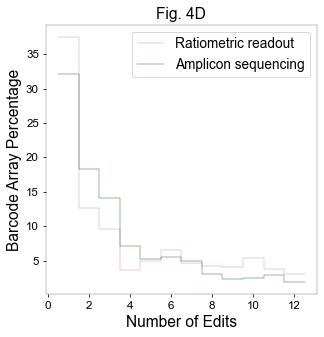

In [579]:
# Custom color palette
custom_palette = sns.color_palette("cubehelix", 5)

# Data loading for ratiometric readout
temp_df = bc_df.loc[(bc_df['mout avg'] > 0.828656) & (bc_df['mout avg'] < 11.684595)].copy()
bin_labels = range(1, 13)
# Use pd.cut to categorize 'mout avg' values into the defined bins
temp_df['Bin_Label'] = pd.cut(temp_df['mout avg'], bins=12, labels=bin_labels, include_lowest=True)

# Create figure
plt.figure(figsize=(5, 5), dpi=70)

# Histogram for ratiometric readout
sns.histplot(data=temp_df, stat='percent', element='step', discrete=True, fill=False, x='Bin_Label', weights='barcode_number', bins=12, color=custom_palette[3], label='Ratiometric readout', linewidth=0.5)
# Histogram for amplicon sequencing
sns.histplot(data=display_df, stat='percent', element='step', discrete=True, fill=False, x='edits', color=custom_palette[1], label='Amplicon sequencing', linewidth=0.5)

# Labels and title
plt.xlabel('Number of Edits')
plt.ylabel('Barcode Array Percentage')
plt.title('Fig. 4D')

# Legend
plt.legend(loc='upper right', fontsize=14)

# Thin border lines
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.25)

# Show plot
plt.show()

# Fig S4B

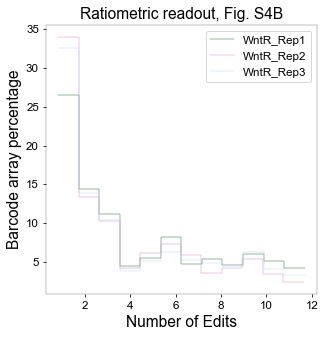

In [580]:
custom_palette = sns.color_palette("cubehelix", 5)
temp_df = bc_df.loc[(bc_df['mout avg'] > 0.828656)&(bc_df['mout avg'] < 11.684595)].copy()
temp_df_1 = temp_df.loc[temp_df['cell_line']==1].copy()
temp_df_2 = temp_df.loc[temp_df['cell_line']==2].copy()
temp_df_3 = temp_df.loc[temp_df['cell_line']==3].copy()

plt.figure(figsize=(5, 5), dpi=70)
sns.histplot(data=temp_df_1, stat='percent', element='step', discrete=False, fill=False, x='mout avg', bins=12, color=custom_palette[1], label='WntR_Rep1', linewidth=0.5)
sns.histplot(data=temp_df_2, stat='percent', element='step', discrete=False, fill=False, x='mout avg', bins=12, color=custom_palette[3], label='WntR_Rep2', linewidth=0.5)
sns.histplot(data=temp_df_3, stat='percent', element='step', discrete=False, fill=False, x='mout avg', bins=12, color=custom_palette[4], label='WntR_Rep3', linewidth=0.5)

plt.xlabel('Number of Edits')
plt.ylabel('Barcode array percentage')
plt.title('Ratiometric readout, Fig. S4B')
#plt.ylim(0,40)
plt.legend(loc='upper right')
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
#save_path = os.path.join(data_dir, '240130_dWntRsg21_3_replicas_percentage of barcode for each edits number by imaging.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig. S4C

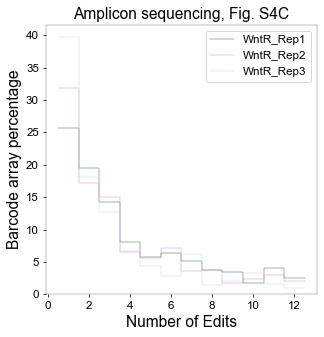

In [581]:
custom_palette = sns.color_palette("cubehelix", 5)

temp_df_1 = display_df.loc[display_df['Replicate']=='Rep1'].copy()
temp_df_2 = display_df.loc[display_df['Replicate']=='Rep2'].copy()
temp_df_3 = display_df.loc[display_df['Replicate']=='Rep3'].copy()

plt.figure(figsize=(5, 5), dpi=70)
sns.histplot(data=temp_df_1, stat='percent', element='step', discrete=True, fill=False, x='edits', color=custom_palette[1], label='WntR_Rep1', linewidth=0.5)
sns.histplot(data=temp_df_2, stat='percent', element='step', discrete=True, fill=False, x='edits', color=custom_palette[3], label='WntR_Rep2', linewidth=0.5)
sns.histplot(data=temp_df_3, stat='percent', element='step', discrete=True, fill=False, x='edits', color=custom_palette[4], label='WntR_Rep3', linewidth=0.5)

plt.xlabel('Number of Edits')
plt.ylabel('Barcode array percentage')
plt.title('Amplicon sequencing, Fig. S4C')
plt.legend(loc='upper right')
plt.gca().spines['top'].set_linewidth(0.25)
plt.gca().spines['right'].set_linewidth(0.25)
plt.gca().spines['bottom'].set_linewidth(0.25)
plt.gca().spines['left'].set_linewidth(0.25)
#plt.ylim (0,40)
#plt.xlim (1,12)
#save_path = os.path.join(dirPath, f'240520_dWntRsg21_3_replicas_percentage of barcode for each edit number by seq.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig 4E

In [582]:
freq_df = pd.read_csv(data_path + 'Edit rate for each targeted barcode position_Wnt_BC1_3 x Replicates.csv')
freq_df

,Rep1,Rep2,Rep3,control,reference_plasmid
0,0.301102,0.235113,0.183983,0.051724,0.005212
1,0.340269,0.284394,0.219222,0.068966,0.013708
2,0.311193,0.258993,0.179266,0.137931,0.994179
3,0.200492,0.185376,0.142703,0.103448,0.014964
4,0.243873,0.220408,0.166124,0.068966,0.993490
5,0.260710,0.203093,0.152928,0.103448,0.989644
6,0.188494,0.152577,0.123922,0.068966,0.013699
7,0.197304,0.167523,0.136808,0.103448,0.994179
8,0.156671,0.124871,0.105832,0.172414,0.992208
9,0.200489,0.148454,0.129590,0.137931,0.992223


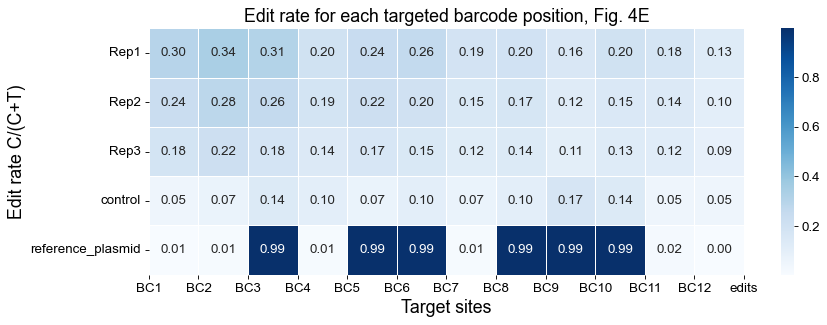

In [583]:
# Plot the heatmap

plt.figure(figsize=(12, 4), dpi=80)
sns.heatmap(freq_df.T, cmap='Blues', annot=True, fmt='.2f',linewidth=0.5)
plt.xlabel('Target sites')
plt.ylabel('Edit rate C/(C+T)')
plt.title('Edit rate for each targeted barcode position, Fig. 4E')
plt.xticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
#save_path = os.path.join(dirPath, f'240520_dWntRsg21_3_replicas_editing_rate for each barcode.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

# Fig 4F

In [584]:
def leftmost_n(row, n):
    count = 0
    for i, val in enumerate(row):
        if val == 1:
            count += 1
            if count == n:
                return i
    return len(row)

# Identify the leftmost, second leftmost, third leftmost, etc. occurrences of '1' in each row
for n in range(1, display_df['edits'].max() + 1):
    display_df[f'leftmost_{n}'] = display_df.apply(lambda row: leftmost_n(row[:-2], n), axis=1)

# Create a list of columns for sorting
sort_columns = ['edits'] + [f'leftmost_{n}' for n in range(1, display_df['edits'].max() + 1)]

# Sort the DataFrame by 'edits' and the leftmost occurrences
display_df.sort_values(by=sort_columns, inplace=True)

# Display the sorted DataFrame
display_df.iloc[:, :13]

,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,BC9,BC10,BC11,BC12,edits
11,1,0,0,0,0,0,0,0,0,0,0,0,1
13,1,0,0,0,0,0,0,0,0,0,0,0,1
14,1,0,0,0,0,0,0,0,0,0,0,0,1
28,1,0,0,0,0,0,0,0,0,0,0,0,1
29,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1,1,1,1,1,1,1,1,1,1,1,1,12
1432,1,1,1,1,1,1,1,1,1,1,1,1,12
1433,1,1,1,1,1,1,1,1,1,1,1,1,12
1434,1,1,1,1,1,1,1,1,1,1,1,1,12


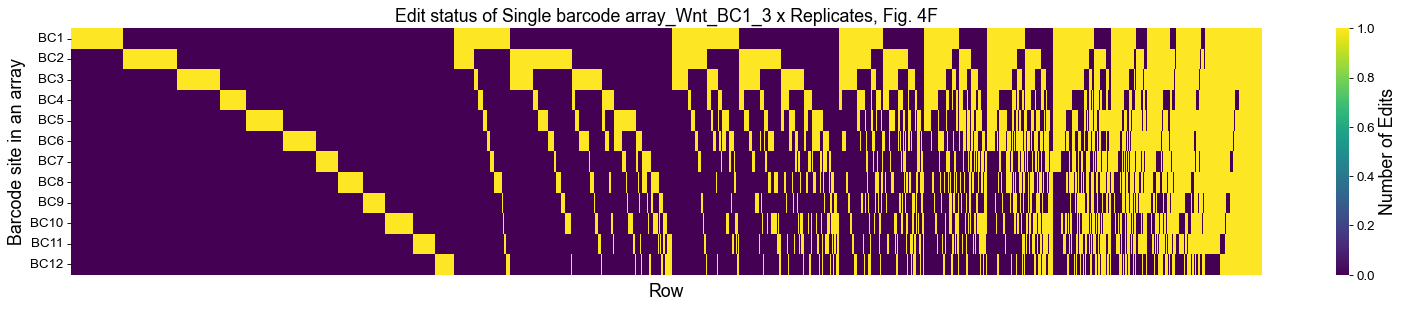

In [585]:
import os
# Select the columns from BC1 to BC12 for the heatmap
heatmap_data = display_df.iloc[:, :12]

# Transpose the data for the heatmap
heatmap_data = heatmap_data.T

# Plot the heatmap
plt.figure(figsize=(24, 4), dpi=80)
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Edits'}, xticklabels=False, yticklabels=True)
plt.xlabel('Row')
plt.ylabel('Barcode site in an array')
plt.title('Edit status of Single barcode array_Wnt_BC1_3 x Replicates, Fig. 4F')
#save_path = os.path.join(dirPath, f'240520_dWntRsg21_3_replicas_editing_pattern.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

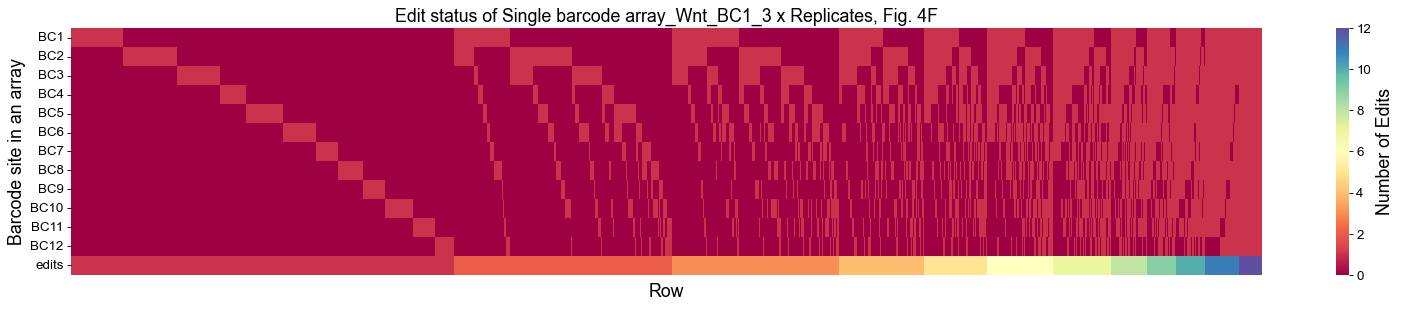

In [586]:
import os
# Select the columns from BC1 to BC12 for the heatmap
heatmap_data = display_df.iloc[:, :13]

# Transpose the data for the heatmap
heatmap_data = heatmap_data.T

# Plot the heatmap
plt.figure(figsize=(24, 4), dpi=80)
sns.heatmap(heatmap_data, cmap='Spectral', cbar_kws={'label': 'Number of Edits'}, xticklabels=False, yticklabels=True)
plt.xlabel('Row')
plt.ylabel('Barcode site in an array')
plt.title('Edit status of Single barcode array_Wnt_BC1_3 x Replicates, Fig. 4F')
#save_path = os.path.join(dirPath, f'240520_dWntRsg21_3_replicas_editing_pattern_1.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()